***
## Parte I

Esta primeira parte do trabalho tem dois objetivos principais. O primeiro é verificar alguns parâmetros do
hardware e do software utilizado e o segundo é que os estudantes preparem e se familiarizar com o
ambiente do PostgreSQL

- _Isabella Almeida Macedo Daniel-22250544_
- _Lucas do Nascimento Silva-22250552_
- _Luis Felipe dos Santos Lima-22250554_

--------------------------------------------
### Tarefa 1 – Instalação do PostgreSQL

A primeira tarefa deste trabalho consiste na instalação do PostgreSQL.
As fontes e as instruções de instalação estão em: http://www.postgresql.org.

__Entrega:__ Deve ser apresentada saída do log de instalação.


In [1]:
!psql --version

psql (PostgreSQL) 17.1 (Ubuntu 17.1-1.pgdg22.04+1)


--------------------------------------------
### Tarefa 2 – Geração de um BD de testes

A segunda tarefa deste trabalho consiste na criação de banco de dados em cada um dos sistemas e o
povoamento destas tabelas com dados sintéticos.
Para a definição do esquema das tabelas e os dados a
serem carregados usaremos a especificação e os utilitários fornecidos pelos Benchmark TPC-H
(http://www.tpc.org/tpch/).

Para geração do BD no PostgreSQL, siga as instruções disponíveis em:
https://github.com/foliveirafilho/tpch-pgsql

__Entrega:__ Devem ser apresentadas as saídas da execução dos scripts de geração.


In [1]:
!git clone https://github.com/foliveirafilho/tpch-pgsql.git

print("repositório clonado")

fatal: destination path 'tpch-pgsql' already exists and is not an empty directory.
repositório clonado


In [2]:
!cd tpch-pgsql && wget -q https://github.com/electrum/tpch-dbgen/archive/32f1c1b92d1664dba542e927d23d86ffa57aa253.zip -O tpch-dbgen.zip
!cd tpch-pgsql && unzip -q tpch-dbgen.zip && mv tpch-dbgen-32f1c1b92d1664dba542e927d23d86ffa57aa253 tpch-dbgen && rm tpch-dbgen.zip

print("os arquivos foram baixados")

replace tpch-dbgen-32f1c1b92d1664dba542e927d23d86ffa57aa253/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
os arquivos foram baixados


In [4]:
!gcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
!python3 --version

Python 3.10.12


In [6]:
!pip3 install -r tpch-pgsql/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [7]:
!pg_config --version

PostgreSQL 17.1 (Ubuntu 17.1-1.pgdg22.04+1)


In [8]:
!sudo -S -u postgres createuser tpch < mypassword.txt
!sudo -S -u postgres createdb tpchdb < mypassword.txt

[sudo] senha para luis: createuser: erro: criação de nova role falhou: ERRO:  a função de banco de dados (role) "tpch" já existe
[sudo] senha para luis: createdb: erro: criação do banco de dados falhou: ERRO:  o banco de dados "tpchdb" já existe


In [9]:
!sudo -S -u postgres psql -U postgres -c "ALTER USER tpch WITH ENCRYPTED PASSWORD 'test123';" < mypassword.txt
!sudo -S -u postgres psql -U postgres -c "GRANT ALL PRIVILEGES ON DATABASE tpchdb TO tpch;" < mypassword.txt

[sudo] senha para luis: ALTER ROLE
[sudo] senha para luis: GRANT


In [10]:
# Entrando no diretório tpch-pgsql e Executando o script de preparação do banco de dados
!cd tpch-pgsql && python3 tpch_pgsql.py prepare -p 5432 -U tpch -W test123 -d tpchdb

print("Sucesso ao criar o banco de dados !!!")

make: Nada a ser feito para 'all'.
built dbgen from source
TPC-H Population Generator (Version 2.14.0)
Copyright Transaction Processing Performance Council 1994 - 2010
Generating data for suppliers table
Preloading text ...                                                                                                                                                                                                                                                                                                              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [13]:
!cd tpch-pgsql && python3 tpch_pgsql.py load -p 5432 -U tpch -W test123 -d tpchdb

dropped existing tables
cleaned database tpchdb
done creating schemas
done loading data to tables
done creating indexes and foreign keys
=========================== Load ===========================
create_schema: : 0:00:00.015180
load_data: 0:00:13.684943
index_tables: 0:00:13.428732
======================= End Results ========================


-----------------------------
### Tarefa 3 – Execução de Consultas
A terceira tarefa deste trabalho consiste na execução de uma série de consultas do Benchmark TPC-H
nos sistemas instalados.

Usando as instruções disponíveis nas mesmas URLs acima, execute os passos referentes ao
PostgreSQL.

__Entrega:__ Devem ser apresentadas as consultas e os seus resultados


#### Consulta 1.sql

In [14]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/1.sql

-- using 1731880669 as a seed to the RNG


select
	l_returnflag,
	l_linestatus,
	sum(l_quantity) as sum_qty,
	sum(l_extendedprice) as sum_base_price,
	sum(l_extendedprice * (1 - l_discount)) as sum_disc_price,
	sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge,
	avg(l_quantity) as avg_qty,
	avg(l_extendedprice) as avg_price,
	avg(l_discount) as avg_disc,
	count(*) as count_order
from
	lineitem
where
	l_shipdate <= date '1998-12-01' - interval '92' day
group by
	l_returnflag,
	l_linestatus
order by
	l_returnflag,
	l_linestatus
LIMIT 1;


In [15]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/1.sql

 l_returnflag | l_linestatus | sum_qty  | sum_base_price |  sum_disc_price  |     sum_charge     |       avg_qty       |     avg_price      |        avg_disc        | count_order 
--------------+--------------+----------+----------------+------------------+--------------------+---------------------+--------------------+------------------------+-------------
 A            | F            | 37734107 | 56586554400.73 | 53758257134.8700 | 55909065222.827692 | 25.5220058532573370 | 38273.129734621672 | 0.04998529583839761162 |     1478493
(1 linha)



#### Consulta 2.sql

In [16]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/2.sql

-- using 1731880669 as a seed to the RNG


select
	s_acctbal,
	s_name,
	n_name,
	p_partkey,
	p_mfgr,
	s_address,
	s_phone,
	s_comment
from
	part,
	supplier,
	partsupp,
	nation,
	region
where
	p_partkey = ps_partkey
	and s_suppkey = ps_suppkey
	and p_size = 46
	and p_type like '%NICKEL'
	and s_nationkey = n_nationkey
	and n_regionkey = r_regionkey
	and r_name = 'ASIA'
	and ps_supplycost = (
		select
			min(ps_supplycost)
		from
			partsupp,
			supplier,
			nation,
			region
		where
			p_partkey = ps_partkey
			and s_suppkey = ps_suppkey
			and s_nationkey = n_nationkey
			and n_regionkey = r_regionkey
			and r_name = 'ASIA'
	)
order by
	s_acctbal desc,
	n_name,
	s_name,
	p_partkey
LIMIT 100;


In [17]:
# Mostrando o resultado da consulta
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/2.sql

 s_acctbal |          s_name           |          n_name           | p_partkey |          p_mfgr           |                s_address                 |     s_phone     |                                              s_comment                                               
-----------+---------------------------+---------------------------+-----------+---------------------------+------------------------------------------+-----------------+------------------------------------------------------------------------------------------------------
   9940.38 | Supplier#000008242        | INDONESIA                 |    150696 | Manufacturer#3            | nWK3gGNbv815 hQkLupnBYtr j               | 19-964-284-8680 | braids. requests detect slyly about the slyly unusual theodo
   9899.24 | Supplier#000002747        | INDIA                     |     40242 | Manufacturer#4            | Tg3 99K0lqdnqP3tr                        | 18-107-661-2022 |  requests dazzle slyly above the deposits. ironically e

#### Consulta 3.sql

In [18]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/3.sql

-- using 1731880669 as a seed to the RNG


select
	l_orderkey,
	sum(l_extendedprice * (1 - l_discount)) as revenue,
	o_orderdate,
	o_shippriority
from
	customer,
	orders,
	lineitem
where
	c_mktsegment = 'BUILDING'
	and c_custkey = o_custkey
	and l_orderkey = o_orderkey
	and o_orderdate < date '1995-03-18'
	and l_shipdate > date '1995-03-18'
group by
	l_orderkey,
	o_orderdate,
	o_shippriority
order by
	revenue desc,
	o_orderdate
LIMIT 10;

In [19]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/3.sql

 l_orderkey |   revenue   | o_orderdate | o_shippriority 
------------+-------------+-------------+----------------
    3459808 | 405838.6989 | 1995-03-04  |              0
     492164 | 390324.0610 | 1995-02-19  |              0
    1188320 | 384537.9359 | 1995-03-09  |              0
    1368674 | 379739.9997 | 1995-03-16  |              0
    2435712 | 378673.0558 | 1995-02-26  |              0
    4878020 | 378376.7952 | 1995-03-12  |              0
    1163712 | 377409.2753 | 1995-03-15  |              0
    5521732 | 375153.9215 | 1995-03-13  |              0
    2628192 | 373133.3094 | 1995-02-22  |              0
     993600 | 371407.4595 | 1995-03-05  |              0
(10 linhas)



#### Consulta 4.sql

In [20]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/4.sql

-- using 1731880669 as a seed to the RNG


select
	o_orderpriority,
	count(*) as order_count
from
	orders
where
	o_orderdate >= date '1995-09-01'
	and o_orderdate < date '1995-09-01' + interval '3' month
	and exists (
		select
			*
		from
			lineitem
		where
			l_orderkey = o_orderkey
			and l_commitdate < l_receiptdate
	)
group by
	o_orderpriority
order by
	o_orderpriority
LIMIT 1;


In [21]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/4.sql

 o_orderpriority | order_count 
-----------------+-------------
 1-URGENT        |       10379
(1 linha)



#### Consulta 5.sql

In [22]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/5.sql

-- using 1731880669 as a seed to the RNG


select
	n_name,
	sum(l_extendedprice * (1 - l_discount)) as revenue
from
	customer,
	orders,
	lineitem,
	supplier,
	nation,
	region
where
	c_custkey = o_custkey
	and l_orderkey = o_orderkey
	and l_suppkey = s_suppkey
	and c_nationkey = s_nationkey
	and s_nationkey = n_nationkey
	and n_regionkey = r_regionkey
	and r_name = 'AFRICA'
	and o_orderdate >= date '1995-01-01'
	and o_orderdate < date '1995-01-01' + interval '1' year
group by
	n_name
order by
	revenue desc
LIMIT 1;


In [23]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/5.sql

          n_name           |    revenue    
---------------------------+---------------
 ALGERIA                   | 55934306.6140
(1 linha)



#### Consulta 6.sql

In [24]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/6.sql

-- using 1731880669 as a seed to the RNG


select
	sum(l_extendedprice * l_discount) as revenue
from
	lineitem
where
	l_shipdate >= date '1995-01-01'
	and l_shipdate < date '1995-01-01' + interval '1' year
	and l_discount between 0.02 - 0.01 and 0.02 + 0.01
	and l_quantity < 25
LIMIT 1;


In [25]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/6.sql

    revenue    
---------------
 44871575.1799
(1 linha)



#### Consulta 7.sql

In [26]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/7.sql

-- using 1731880669 as a seed to the RNG


select
	supp_nation,
	cust_nation,
	l_year,
	sum(volume) as revenue
from
	(
		select
			n1.n_name as supp_nation,
			n2.n_name as cust_nation,
			extract(year from l_shipdate) as l_year,
			l_extendedprice * (1 - l_discount) as volume
		from
			supplier,
			lineitem,
			orders,
			customer,
			nation n1,
			nation n2
		where
			s_suppkey = l_suppkey
			and o_orderkey = l_orderkey
			and c_custkey = o_custkey
			and s_nationkey = n1.n_nationkey
			and c_nationkey = n2.n_nationkey
			and (
				(n1.n_name = 'ALGERIA' and n2.n_name = 'ROMANIA')
				or (n1.n_name = 'ROMANIA' and n2.n_name = 'ALGERIA')
			)
			and l_shipdate between date '1995-01-01' and date '1996-12-31'
	) as shipping
group by
	supp_nation,
	cust_nation,
	l_year
order by
	supp_nation,
	cust_nation,
	l_year
LIMIT 1;

In [27]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/7.sql

        supp_nation        |        cust_nation        | l_year |    revenue    
---------------------------+---------------------------+--------+---------------
 ALGERIA                   | ROMANIA                   |   1995 | 56624614.5272
(1 linha)



#### Consulta 8.sql

In [28]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/8.sql

-- using 1731880669 as a seed to the RNG


select
	o_year,
	sum(case
		when nation = 'ROMANIA' then volume
		else 0
	end) / sum(volume) as mkt_share
from
	(
		select
			extract(year from o_orderdate) as o_year,
			l_extendedprice * (1 - l_discount) as volume,
			n2.n_name as nation
		from
			part,
			supplier,
			lineitem,
			orders,
			customer,
			nation n1,
			nation n2,
			region
		where
			p_partkey = l_partkey
			and s_suppkey = l_suppkey
			and l_orderkey = o_orderkey
			and o_custkey = c_custkey
			and c_nationkey = n1.n_nationkey
			and n1.n_regionkey = r_regionkey
			and r_name = 'EUROPE'
			and s_nationkey = n2.n_nationkey
			and o_orderdate between date '1995-01-01' and date '1996-12-31'
			and p_type = 'PROMO PLATED COPPER'
	) as all_nations
group by
	o_year
order by
	o_year
LIMIT 1;

In [29]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/8.sql

 o_year |       mkt_share        
--------+------------------------
   1995 | 0.03991528049594334785
(1 linha)



#### Consulta 9.sql

In [30]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/9.sql

-- using 1731880669 as a seed to the RNG


select
	nation,
	o_year,
	sum(amount) as sum_profit
from
	(
		select
			n_name as nation,
			extract(year from o_orderdate) as o_year,
			l_extendedprice * (1 - l_discount) - ps_supplycost * l_quantity as amount
		from
			part,
			supplier,
			lineitem,
			partsupp,
			orders,
			nation
		where
			s_suppkey = l_suppkey
			and ps_suppkey = l_suppkey
			and ps_partkey = l_partkey
			and p_partkey = l_partkey
			and o_orderkey = l_orderkey
			and s_nationkey = n_nationkey
			and p_name like '%thistle%'
	) as profit
group by
	nation,
	o_year
order by
	nation,
	o_year desc
LIMIT 1;

In [31]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/9.sql

          nation           | o_year |  sum_profit   
---------------------------+--------+---------------
 ALGERIA                   |   1998 | 31407175.2191
(1 linha)



#### Consulta 10.sql

In [32]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/10.sql

-- using 1731880669 as a seed to the RNG


select
	c_custkey,
	c_name,
	sum(l_extendedprice * (1 - l_discount)) as revenue,
	c_acctbal,
	n_name,
	c_address,
	c_phone,
	c_comment
from
	customer,
	orders,
	lineitem,
	nation
where
	c_custkey = o_custkey
	and l_orderkey = o_orderkey
	and o_orderdate >= date '1994-02-01'
	and o_orderdate < date '1994-02-01' + interval '3' month
	and l_returnflag = 'R'
	and c_nationkey = n_nationkey
group by
	c_custkey,
	c_name,
	c_acctbal,
	c_phone,
	n_name,
	c_address,
	c_comment
order by
	revenue desc
LIMIT 20;

In [33]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/10.sql

 c_custkey |       c_name       |   revenue   | c_acctbal |          n_name           |              c_address               |     c_phone     |                                                      c_comment                                                       
-----------+--------------------+-------------+-----------+---------------------------+--------------------------------------+-----------------+----------------------------------------------------------------------------------------------------------------------
    103780 | Customer#000103780 | 682401.9358 |   7809.66 | ETHIOPIA                  | qmCa2H3EzMUR4O65VB0fzisED8           | 15-355-745-3509 |  serve quickly across the even ideas. ironic ideas poach furiously above the carefully pending the
    144526 | Customer#000144526 | 680209.7103 |   1031.97 | KENYA                     | ORUvZI4ziHHpATV1 VAxf47RGwiBUeuE0RSg | 24-447-657-1591 | e along the permanent, express dolphins. deposits affix furiously blithely express in

#### Consulta 11.sql

In [34]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/11.sql

-- using 1731880669 as a seed to the RNG


select
	ps_partkey,
	sum(ps_supplycost * ps_availqty) as value
from
	partsupp,
	supplier,
	nation
where
	ps_suppkey = s_suppkey
	and s_nationkey = n_nationkey
	and n_name = 'UNITED KINGDOM'
group by
	ps_partkey having
		sum(ps_supplycost * ps_availqty) > (
			select
				sum(ps_supplycost * ps_availqty) * 0.0001000000
			from
				partsupp,
				supplier,
				nation
			where
				ps_suppkey = s_suppkey
				and s_nationkey = n_nationkey
				and n_name = 'UNITED KINGDOM'
		)
order by
	value desc
LIMIT 1;

In [35]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/11.sql

 ps_partkey |    value    
------------+-------------
     121139 | 17389780.68
(1 linha)



#### Consulta 12.sql

In [36]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/12.sql

-- using 1731880669 as a seed to the RNG


select
	l_shipmode,
	sum(case
		when o_orderpriority = '1-URGENT'
			or o_orderpriority = '2-HIGH'
			then 1
		else 0
	end) as high_line_count,
	sum(case
		when o_orderpriority <> '1-URGENT'
			and o_orderpriority <> '2-HIGH'
			then 1
		else 0
	end) as low_line_count
from
	orders,
	lineitem
where
	o_orderkey = l_orderkey
	and l_shipmode in ('TRUCK', 'SHIP')
	and l_commitdate < l_receiptdate
	and l_shipdate < l_commitdate
	and l_receiptdate >= date '1994-01-01'
	and l_receiptdate < date '1994-01-01' + interval '1' year
group by
	l_shipmode
order by
	l_shipmode
LIMIT 1;

In [37]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/12.sql

 l_shipmode | high_line_count | low_line_count 
------------+-----------------+----------------
 SHIP       |            6200 |           9262
(1 linha)



#### Consulta 13.sql

In [38]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/13.sql

-- using 1731880669 as a seed to the RNG


select
	c_count,
	count(*) as custdist
from
	(
		select
			c_custkey,
			count(o_orderkey)
		from
			customer left outer join orders on
				c_custkey = o_custkey
				and o_comment not like '%express%requests%'
		group by
			c_custkey
	) as c_orders (c_custkey, c_count)
group by
	c_count
order by
	custdist desc,
	c_count desc
LIMIT 1;

In [39]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/13.sql

 c_count | custdist 
---------+----------
       0 |    50004
(1 linha)



#### Consulta 14.sql

In [40]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/14.sql

-- using 1731880669 as a seed to the RNG


select
	100.00 * sum(case
		when p_type like 'PROMO%'
			then l_extendedprice * (1 - l_discount)
		else 0
	end) / sum(l_extendedprice * (1 - l_discount)) as promo_revenue
from
	lineitem,
	part
where
	l_partkey = p_partkey
	and l_shipdate >= date '1994-05-01'
	and l_shipdate < date '1994-05-01' + interval '1' month
LIMIT 1;

In [41]:

!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/14.sql

    promo_revenue    
---------------------
 16.5107260405095025
(1 linha)



#### Consulta 15.sql

In [42]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/15.sql

-- using 1731880669 as a seed to the RNG

create view revenue0 (supplier_no, total_revenue) as
	select
		l_suppkey,
		sum(l_extendedprice * (1 - l_discount))
	from
		lineitem
	where
		l_shipdate >= date '1993-12-01'
		and l_shipdate < date '1993-12-01' + interval '3' month
	group by
		l_suppkey;


select
	s_suppkey,
	s_name,
	s_address,
	s_phone,
	total_revenue
from
	supplier,
	revenue0
where
	s_suppkey = supplier_no
	and total_revenue = (
		select
			max(total_revenue)
		from
			revenue0
	)
order by
	s_suppkey
LIMIT 1;

drop view revenue0;

In [43]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/15.sql

CREATE VIEW
 s_suppkey |          s_name           |                s_address                 |     s_phone     | total_revenue 
-----------+---------------------------+------------------------------------------+-----------------+---------------
      5449 | Supplier#000005449        | fhc8lUuZdqWUujcVaWogowEq1WVL9Y8m1efwCl3G | 31-787-239-2170 |  1817907.7139
(1 linha)

DROP VIEW


#### Consulta 16.sql

In [44]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/16.sql

-- using 1731880669 as a seed to the RNG


select
	p_brand,
	p_type,
	p_size,
	count(distinct ps_suppkey) as supplier_cnt
from
	partsupp,
	part
where
	p_partkey = ps_partkey
	and p_brand <> 'Brand#25'
	and p_type not like 'ECONOMY PLATED%'
	and p_size in (2, 38, 28, 16, 48, 24, 44, 30)
	and ps_suppkey not in (
		select
			s_suppkey
		from
			supplier
		where
			s_comment like '%Customer%Complaints%'
	)
group by
	p_brand,
	p_type,
	p_size
order by
	supplier_cnt desc,
	p_brand,
	p_type,
	p_size
LIMIT 1;

In [45]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/16.sql

  p_brand   |        p_type         | p_size | supplier_cnt 
------------+-----------------------+--------+--------------
 Brand#51   | ECONOMY BRUSHED STEEL |     38 |           32
(1 linha)



#### Consulta 17.sql

In [46]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/17.sql

-- using 1731880669 as a seed to the RNG


select
	sum(l_extendedprice) / 7.0 as avg_yearly
from
	lineitem,
	part,
	(SELECT l_partkey AS agg_partkey, 0.2 * avg(l_quantity) AS avg_quantity FROM lineitem GROUP BY l_partkey) part_agg
where
	p_partkey = l_partkey
	and agg_partkey = l_partkey
	and p_brand = 'Brand#54'
	and p_container = 'SM BOX'
	and l_quantity < avg_quantity
LIMIT 1;


In [47]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/17.sql

     avg_yearly      
---------------------
 312961.275714285714
(1 linha)



#### Consulta 18.sql

In [48]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/18.sql

-- using 1731880669 as a seed to the RNG


select
	c_name,
	c_custkey,
	o_orderkey,
	o_orderdate,
	o_totalprice,
	sum(l_quantity)
from
	customer,
	orders,
	lineitem
where
	o_orderkey in (
		select
			l_orderkey
		from
			lineitem
		group by
			l_orderkey having
				sum(l_quantity) > 314
	)
	and c_custkey = o_custkey
	and o_orderkey = l_orderkey
group by
	c_name,
	c_custkey,
	o_orderkey,
	o_orderdate,
	o_totalprice
order by
	o_totalprice desc,
	o_orderdate
LIMIT 100;

In [49]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/18.sql

       c_name       | c_custkey | o_orderkey | o_orderdate | o_totalprice | sum 
--------------------+-----------+------------+-------------+--------------+-----
 Customer#000128120 |    128120 |    4722021 | 1994-04-07  |    544089.09 | 323
 Customer#000144617 |    144617 |    3043270 | 1997-02-12  |    530604.44 | 317
 Customer#000066790 |     66790 |    2199712 | 1996-09-30  |    515531.82 | 327
 Customer#000015619 |     15619 |    3767271 | 1996-08-07  |    480083.96 | 318
 Customer#000147197 |    147197 |    1263015 | 1997-02-02  |    467149.67 | 320
 Customer#000117919 |    117919 |    2869152 | 1996-06-20  |    456815.92 | 317
 Customer#000126865 |    126865 |    4702759 | 1994-11-07  |    447606.65 | 320
 Customer#000036619 |     36619 |    4806726 | 1995-01-17  |    446704.09 | 328
 Customer#000119989 |    119989 |    1544643 | 1997-09-20  |    434568.25 | 320
(9 linhas)



#### Consulta 19.sql

In [50]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/19.sql

-- using 1731880669 as a seed to the RNG


select
	sum(l_extendedprice* (1 - l_discount)) as revenue
from
	lineitem,
	part
where
	(
		p_partkey = l_partkey
		and p_brand = 'Brand#14'
		and p_container in ('SM CASE', 'SM BOX', 'SM PACK', 'SM PKG')
		and l_quantity >= 9 and l_quantity <= 9 + 10
		and p_size between 1 and 5
		and l_shipmode in ('AIR', 'AIR REG')
		and l_shipinstruct = 'DELIVER IN PERSON'
	)
	or
	(
		p_partkey = l_partkey
		and p_brand = 'Brand#32'
		and p_container in ('MED BAG', 'MED BOX', 'MED PKG', 'MED PACK')
		and l_quantity >= 15 and l_quantity <= 15 + 10
		and p_size between 1 and 10
		and l_shipmode in ('AIR', 'AIR REG')
		and l_shipinstruct = 'DELIVER IN PERSON'
	)
	or
	(
		p_partkey = l_partkey
		and p_brand = 'Brand#53'
		and p_container in ('LG CASE', 'LG BOX', 'LG PACK', 'LG PKG')
		and l_quantity >= 29 and l_quantity <= 29 + 10
		and p_size between 1 and 15
		and l_shipmode in ('AIR', 'AIR REG')
		and l_shipinstruct = 'DELIVER IN PERSON'
	)
LIMIT 1;

In [51]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/19.sql

   revenue    
--------------
 4150918.5507
(1 linha)



#### Consulta 20.sql

In [52]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/20.sql

-- using 1731880669 as a seed to the RNG


select
	s_name,
	s_address
from
	supplier,
	nation
where
	s_suppkey in (
		select
			ps_suppkey
		from
			partsupp,
			(
				select
					l_partkey agg_partkey,
					l_suppkey agg_suppkey,
					0.5 * sum(l_quantity) AS agg_quantity
				from
					lineitem
				where
					l_shipdate >= date '1995-01-01'
					and l_shipdate < date '1995-01-01' + interval '1' year
				group by
					l_partkey,
					l_suppkey
			) agg_lineitem
		where
			agg_partkey = ps_partkey
			and agg_suppkey = ps_suppkey
			and ps_partkey in (
				select
					p_partkey
				from
					part
				where
					p_name like 'purple%'
			)
			and ps_availqty > agg_quantity
	)
	and s_nationkey = n_nationkey
	and n_name = 'FRANCE'
order by
	s_name
LIMIT 1;


In [53]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/20.sql

          s_name           |                s_address                 
---------------------------+------------------------------------------
 Supplier#000000090        | bPE6Uhz1f2m3gwSGMrnRt,g,3gq37r5kxgphqss1
(1 linha)



#### Consulta 21.sql

In [54]:
!cat /home/luis/Amazon/tp3_BD# Mostrando o resultado da consulta/notebooks/tpch-pgsql/query_root/perf_query_gen/21.sql

-- using 1731880669 as a seed to the RNG


select
	s_name,
	count(*) as numwait
from
	supplier,
	lineitem l1,
	orders,
	nation
where
	s_suppkey = l1.l_suppkey
	and o_orderkey = l1.l_orderkey
	and o_orderstatus = 'F'
	and l1.l_receiptdate > l1.l_commitdate
	and exists (
		select
			*
		from
			lineitem l2
		where
			l2.l_orderkey = l1.l_orderkey
			and l2.l_suppkey <> l1.l_suppkey
	)
	and not exists (
		select
			*
		from
			lineitem l3
		where
			l3.l_orderkey = l1.l_orderkey
			and l3.l_suppkey <> l1.l_suppkey
			and l3.l_receiptdate > l3.l_commitdate
	)
	and s_nationkey = n_nationkey
	and n_name = 'JORDAN'
group by
	s_name
order by
	numwait desc,
	s_name
LIMIT 100;

In [55]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/21.sql

          s_name           | numwait 
---------------------------+---------
 Supplier#000001915        |      23
 Supplier#000006206        |      21
 Supplier#000009806        |      21
 Supplier#000005984        |      18
 Supplier#000008004        |      18
 Supplier#000000626        |      17
 Supplier#000001067        |      17
 Supplier#000001302        |      17
 Supplier#000006266        |      17
 Supplier#000004125        |      16
 Supplier#000008271        |      16
 Supplier#000000312        |      15
 Supplier#000000789        |      15
 Supplier#000002110        |      15
 Supplier#000002430        |      15
 Supplier#000002751        |      15
 Supplier#000004660        |      15
 Supplier#000005179        |      15
 Supplier#000005285        |      15
 Supplier#000005291        |      15
 Supplier#000006347        |      15
 Supplier#000008521        |      15
 Supplier#000000806        |      14
 Supplier#000001100        |      14
 Supplier#000001605        |      14

#### Consulta 22.sql

In [56]:
!cat /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/22.sql

-- using 1731880669 as a seed to the RNG


select
	cntrycode,
	count(*) as numcust,
	sum(c_acctbal) as totacctbal
from
	(
		select
			substring(c_phone from 1 for 2) as cntrycode,
			c_acctbal
		from
			customer
		where
			substring(c_phone from 1 for 2) in
				('26', '43', '31', '41', '35', '42', '34')
			and c_acctbal > (
				select
					avg(c_acctbal)
				from
					customer
				where
					c_acctbal > 0.00
					and substring(c_phone from 1 for 2) in
						('26', '43', '31', '41', '35', '42', '34')
			)
			and not exists (
				select
					*
				from
					orders
				where
					o_custkey = c_custkey
			)
	) as custsale
group by
	cntrycode
order by
	cntrycode
LIMIT 1;

In [57]:
!PGPASSWORD=test123 psql -h localhost -p 5432 -U tpch -d tpchdb -f /home/luis/Amazon/tp3_BD/notebooks/tpch-pgsql/query_root/perf_query_gen/22.sql

 cntrycode | numcust | totacctbal 
-----------+---------+------------
 26        |     855 | 6374598.87
(1 linha)



--------------------------------------------
### Tarefa 4 – Identificação do Sistema
Identifique o sistema que será usado para os experimentos, incluindo informações sobre o hardware e o Sistema Operacional utilizado.
Sobre o tipo de processador, quantidade de memória RAM, tamanho do disco.
Devem ser também apresentadas informações sobre as caches existentes.
Sobre o Sistema Operacional, que devem ser Linux, incluir informações sobre qual a distribuição usada, versão do sistema,
versão do Kernel, etc.

__Entrega:__ As informações pedidas devem ser apresentadas no jupyter notebook


- **Marca do Notebook:** Avell Storm BS I7 RTX 4050

- **Tipo de Processador:** Intel® Core™ i7-12650H Alder Lake (24MB cache, 3.5GHz ~ 4.7GHz Turbo Boost Max 3.0)

- **Memória RAM:** 32GB

- **Tamanho Disco:** 512 GB


- **Caches:**    

  L1d: 416 KiB (10 instances)

  L1i: 448 KiB (10 instances)

  L2: 9,5 MiB (7 instances)

  L3: 24 MiB (1 instance)  

- **Sistema Operacional:** Linux Mint 21.3

- **Distribuição Linux:** Mint

- **Versão do Sistema:** 21.03 (Virginia)

- **Versão do Kernel:** 5.15.0-121-generic



--------------------------------------------
### Tarefa 5 - Verificação de parâmetros de armazenamento


**a)** Verifique no SSD utilizado para os experimentos os seguintes parâmetros: Capacidade total do SSD; Tempo médio de leitura e escrita (latência); Taxa de transferência máxima e média de dados; Endurance (vida útil) em TBW (terabytes escritos); Tipo de memória utilizada (SLC, MLC, TLC, ou QLC); Velocidade de interface (ex.: SATA III, PCIe NVMe).

- **Capacidade total do SSD:** 512 GB
- **Tempo médio de leitura e escrita:** 0,149 ms
- **Taxa de transferência máxima e média de dados:** 835 MB/s   
- **Endurance em TBW:** 6,29 TB
- **Tipo de memória utilizada:** SLC(HFS512GEJ9X108N)
- **Velocidade de interface:** SATA 3 6Gb/s

**b)** Utilize o comando hdparm ou lsblk para verificar as configurações do sistema operacional e os parâmetros disponíveis para o SSD.

In [58]:
!lsblk
!smartctl
!hdparm

NAME        MAJ:MIN RM   SIZE RO TYPE MOUNTPOINTS
nvme0n1     259:0    0 476,9G  0 disk 
├─nvme0n1p1 259:1    0   512M  0 part /boot/efi
└─nvme0n1p2 259:2    0 476,4G  0 part /


smartctl 7.2 2020-12-30 r5155 [x86_64-linux-5.15.0-121-generic] (local build)
Copyright (C) 2002-20, Bruce Allen, Christian Franke, www.smartmontools.org

ERROR: smartctl requires a device name as the final command-line argument.


Use smartctl -h to get a usage summary


hdparm - get/set hard disk parameters - version v9.60, by Mark Lord.

clue=6
Usage:  hdparm  [options] [device ...]

Options:
 -a   Get/set fs readahead
 -A   Get/set the drive look-ahead flag (0/1)
 -b   Get/set bus state (0 == off, 1 == on, 2 == tristate)
 -B   Set Advanced Power Management setting (1-255)
 -c   Get/set IDE 32-bit IO setting
 -C   Check drive power mode status
 -d   Get/set using_dma flag
 -D   Enable/disable drive defect management
 -E   Set cd/dvd drive speed
 -f   Flush buffer cache for device on exit
 -F   Flush drive write cache
 -g   Display drive geometry
 -h   Display terse usage information
 -H   Read temperature from drive (Hitachi only)
 -i   Display drive identification
 -I   Detailed/cu

**c)** Verifique o tamanho do bloco utilizado pelo sistema para o SSD; Explique como alterar o tamanho de bloco, caso necessário, embora muitos sistemas ajustem automaticamente o bloco para SSDs modernos.


utilizando o comando **sstat -f /dev/nvme0n1p2**, podemos verificar o tamanho do bloco:

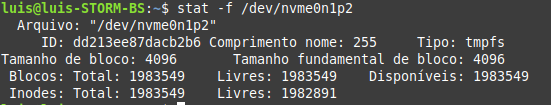

para alterar o tamanho dos blocos basta o comando: **sudo mkfs.ext4 -b tamanho_definido /dev/nvme0n1p2**